In [3]:
import networkx as nx
import numpy as np
import copy
import q1

In [4]:
G = nx.Graph()
G.add_edge(1, 3)
G.add_edge(1, 2)
G.add_edge(2, 4)
G.add_edge(2, 3)
G.add_edge(3, 6)
G.add_edge(4, 7)
G.add_edge(4, 8)
G.add_edge(5, 6)
G.add_edge(5, 8)
G.add_edge(5, 9)
G.add_edge(6, 9)
G.add_edge(6, 10)
G.add_edge(7, 8)
G.add_edge(8, 9)
G.add_edge(9, 10)

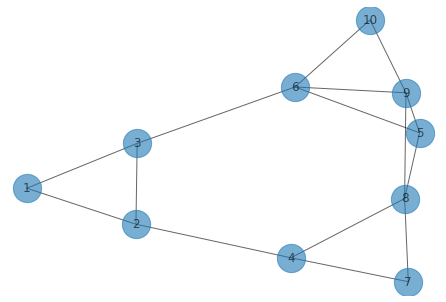

In [5]:
nx.draw(G, node_size=800, with_labels=True, alpha=0.6)

In [6]:
nodelist = [node for node in sorted(G)]
labels = {node : 0.5 for node in nodelist}

In [7]:
labels[3] = labels[5] = 1.0
labels[8] = labels[10]= 0.0
labels

{1: 0.5,
 2: 0.5,
 3: 1.0,
 4: 0.5,
 5: 1.0,
 6: 0.5,
 7: 0.5,
 8: 0.0,
 9: 0.5,
 10: 0.0}

In [8]:
unlabled_nodes = copy.deepcopy(nodelist)
unlabled_nodes.remove(3)
unlabled_nodes.remove(5)
unlabled_nodes.remove(8)
unlabled_nodes.remove(10)
unlabled_nodes


[1, 2, 4, 6, 7, 9]

In [9]:
for i in range(2):
    for node in unlabled_nodes:
        neigh = list(G[node])
        neigh_probs = [labels.get(node) for node in neigh]
        prob = 1 / len(neigh) * sum (neigh_probs)
        labels[node] = prob


In [10]:
print(labels)
rounded_labels = {k:'+' if np.round(v) == 1 else '-' for k, v in labels.items()}
print(f'p(y_2 = +) {labels[2]}  p(y_4 = +) {labels[4]} p(y_6 = +) {labels[6]}')
print(rounded_labels)

{1: 0.875, 2: 0.7638888888888888, 3: 1.0, 4: 0.324074074074074, 5: 1.0, 6: 0.6015625, 7: 0.162037037037037, 8: 0.0, 9: 0.400390625, 10: 0.0}
p(y_2 = +) 0.7638888888888888  p(y_4 = +) 0.324074074074074 p(y_6 = +) 0.6015625
{1: '+', 2: '+', 3: '+', 4: '-', 5: '+', 6: '+', 7: '-', 8: '-', 9: '-', 10: '-'}


We can see that nodes 1, 2, 3, 5, 6 belongs to class + whereas 4, 7, 8, 9, 10 to class -

## Belief propagation

- (i)
$$
\begin{align}
    b_1(x_1) =& \frac{1}{Z} \phi_1(x_1)\cdot m_{21}(x_1) \\
    m_21 =& \sum_{x_2} \phi(x_2) \psi_{21} (x_2, x_1) \cdot m_{32}(x_2) \cdot m_{42}(x_2) \\
    m_32 =& \sum_{x_3} \phi(x_3) \psi_{32} (x_3, x_2) \\
    m_42 =& \sum_{x_4} \phi(x_4) \psi_{42} (x_4, x_2) \\
    b_1(x_1) =& \frac{1}{Z} \phi_1(x_1)\sum_{x_2} \phi(x_2) \psi_{21} (x_2, x_1)\sum_{x_3} \phi(x_3) \psi_{32} (x_3, x_2) \sum_{x_4} \phi(x_4) \psi_{42} (x_4, x_2) \\
     =& \frac{1}{Z} \phi_1(x_1)\sum_{x_2} \sum_{x_3} \sum_{x_4} \phi(x_2) \psi_{21} (x_2, x_1) \phi(x_3) \psi_{32} (x_3, x_2)  \phi(x_4) \psi_{42} (x_4, x_2)
\end{align}
$$

- (ii)
$$
\begin{align}
    p(x_1 \vert y_1, y_2, y_3, y_4) =& \sum_{x_2}\sum_{x_3}\sum_{x_4} p(x_1, x_2, x_3, x_4 \vert  y_1, y_2, y_3, y_4) \\
    =& \frac{1}{Z} \sum_{x_2} \sum_{x_3} \sum_{x_4} \psi_{21} (x_2, x_1) \psi_{32} (x_3, x_2) \psi_{42} (x_4, x_2) \phi_1(x_1) \phi(x_2) \phi(x_3)\phi(x_4)
\end{align}
$$

Considering that the maximum cliques are composed of pair, we can factorize the probability in this way.

- (iii)

b1: [1.418791 1.30009 ]
b2: [2.4871   0.231781]
b3: [0.418    2.300881]
b4: [0.21071 2.261  ]
b5: [1.957  0.5719]


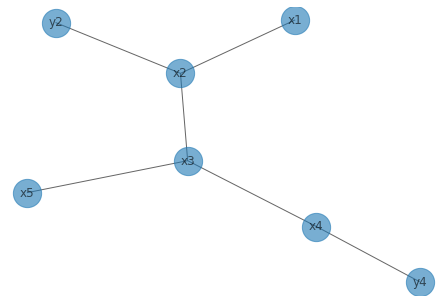

In [11]:
from importlib import reload
reload(q1)
q1.Q1()

For semplicity we can start from the node $x_2$ and $x_4$ that are more closer to the observed variables. By looking at $\phi_2$ and considering that $y_2 = 0$ it is more likely that also $x_2 = 0$.
The node $x_4$ is also in agreement with our expectation since the relation expressed by $\phi_4$ states that is more likely that $x_4$ and $y_4$ are in the same state.
Then, the beliefs of $x_1$, $x_3$, $x_5$ are also in accordance with the respective potentials

##  Node Embeddings with TransE

### Warmup: Why the Comparative Loss?

The loss function can simply minimize the distance by deriving the same embedding for $x1$ and $x3$. This loss function let two nodes share the same node embedding in order to reach the minumum. This can be seen if we consider the following cases:

![title](graphs_same_embedding.png)

In both this cases node $1$ and $3$ will share the same embedding by optimizing the simplified objective function. This could still be acceptable since depending on the meaning relation $l$ $1$ and $3$ could effectively share some similarity. Moreover we want that $\mathbf{h} + \boldsymbol{\mathscr{l}} \not\approx \mathbf{t}$ if $(h, \ell, t) \notin S$. In the graph pictured on the right by adding $\boldsymbol{\ell}$ to $\mathbf{e}_2$ we obtain two equal $\mathbf{t}$, but still they belong to $S$.
However in the following graph this is not true anymore. In fact, $\mathbf{e}_4$ and $\mathbf{e}_5$ node embeddings which are equal to $\mathbf{e}_1 + \boldsymbol{\mathscr{l}}$ and $\mathbf{e}_3 + \boldsymbol{\mathscr{l}}$, share the same embedding. In particular $\mathbf{e}_1 + \boldsymbol{\mathscr{l} \not\approx} \mathbf{e}_5$ (the same goes with node $3$ and $4$) violates the purpose of the optimization of the original loss function.
![](5_node_graph.png)

In the worst case the $\mathcal{L}_{simple}$ does not prevent all the node from getting the same embedding and assigning a zero vector to $\boldsymbol{\ell}$

### The purpose of  the margin
In cases where the term representing the distance of represented by the triples in $S'$ is greater than the :
$$
\mathcal{L}_{\text {no margin }}=\sum_{(h, \ell, t) \in S} \sum_{\left(h^{\prime}, \ell, t^{\prime}\right) \in S_{(h, \ell, t)}^{\prime}}\left[d(\mathbf{h}+\boldsymbol{\ell}, \mathbf{t})-d\left(\mathbf{h}^{\prime}+\boldsymbol{\ell}, \mathbf{t}^{\prime}\right)\right]_{+}
$$
This objective function includes two terms, hence we have a first one which depend on positive example and a second that depend on negative examples. We want to minimize the first term by reducing the distance $d(\mathbf{h}+\boldsymbol{\ell}, \mathbf{t})$ and maximize the absolute value of the second term. However,by considering the positive part function if the first term is minimized enough to achieve $0$ we end up in a similar case to $\mathcal{L}_{simple}$. 
By introducing $\gamma$ we can consider the second term as a whole with the margin. This allow as to provide a penalty that ranges from $\gamma$ to $0$ depending on how far the negative examples are from the positive ones

### Why are Entity Embeddings Normalized
Since rather than narrowing the distance between $\mathbf{h}+\mathbf{l}$ and $t$ we can arbitrary make the original triplets far away from the corrupted ones, and as a consequence from the nodes not directly connected.

### Where TransE fails 
TransE fall short in finding the embedding 1-to-N, N-to-1, and N-to-N relations, because it provides similar  embeddings to all incoming or outcoming neighbors nodes. Specifically in the previously considered two  3 nodes graph examples, we still have all the linked nodes $1$ and $3$ that shares similar embedding. In terms of expressiveness we have that all the nodes linked from $h$ that shares the same relation $\ell$ are implicitly considered similar by the model. The same goes from all the nodes linked to $t$ by the same relation $\ell$. 

Plus in the fallowing case:
<img src='https://g.gravizo.com/svg?
digraph G {
     x1 -> x2 [label="l"]
     x2 -> x3 [label="l"]
     x3 -> x1 [label="l"]
}
'/>
For how TransE is designed to obtain the perfect embedding we need that $\mathbf{e}_1 = \mathbf{e}_1 + 2\boldsymbol{\ell}$ 
This means that the model fails to fully capture this kind of dependencies in learning the embedding.

In [12]:
G_example = nx.MultiDiGraph()
G_example.add_edge(2, 1)
G_example.add_edge(3, 1)

0

In [16]:
from scipy.optimize import minimize 

# x3 = x1 = (np.random.rand(2)*2 -1)*6 / np.sqrt(2)
x1 = (np.random.rand(2)*2 -1)*6 / np.sqrt(2)
x2 = (np.random.rand(2)*2 -1)*6 / np.sqrt(2)
x3 = (np.random.rand(2)*2 -1)*6 / np.sqrt(2)
x4 = (np.random.rand(2)*2 -1)*6 / np.sqrt(2)
x5 = (np.random.rand(2)*2 -1)*6 / np.sqrt(2)
l = (np.random.rand(2)*2 -1)*6 / np.sqrt(2)
l = l / np.linalg.norm(l)
print(x1)
print(x2)
print(x3)
print(x4)
print(x5)
print(l)


[-0.232  2.053]
[-2.428 -1.483]
[-2.313 -4.085]
[0.682 3.202]
[-3.941 -0.806]
[0.755 0.655]


In [17]:
def f(x):
    x1, x2, x3, x4, x5, l = np.split(x, range(2, len(x),2))
    return np.linalg.norm(x2 + l -x1) + np.linalg.norm(x2 + l - x3) + np.linalg.norm(x1 + l - x4) + np.linalg.norm(x3 + l - x5)
def f2(x, margin = 0):
    x1, x2, x3, x4, x5, l = np.split(x, range(2, len(x),2))    
#     x2_x1 = 5*(margin + np.linalg.norm(x2 + l -x1)) - (np.linalg.norm(x2 + l - x4) + np.linalg.norm(x2 + l - x5) + np.linalg.norm(x4 + l - x1) + np.linalg.norm(x3 + l - x1) + np.linalg.norm(x5 + l - x1))
#     x2_x3 = 5*(margin + np.linalg.norm(x2 + l -x3)) - (np.linalg.norm(x2 + l - x4) + np.linalg.norm(x2 + l - x5) + np.linalg.norm(x1 + l - x3) + np.linalg.norm(x4 + l - x3) + np.linalg.norm(x5 + l - x3))
#     x1_x4 = 6*(margin + np.linalg.norm(x1 + l -x4)) - (np.linalg.norm(x1 + l - x2) + np.linalg.norm(x1 + l - x3) + np.linalg.norm(x1 + l - x5) + np.linalg.norm(x2 + l - x4) + np.linalg.norm(x3 + l - x4) + np.linalg.norm(x5 + l - x4))
#     x3_x5 = 6*(margin + np.linalg.norm(x3 + l -x5)) - (np.linalg.norm(x3 + l - x1) + np.linalg.norm(x3 + l - x2) + np.linalg.norm(x3 + l - x4) + np.linalg.norm(x1 + l - x5) + np.linalg.norm(x2 + l - x4) + np.linalg.norm(x4 + l - x5))
    x2_x1 = np.max([margin + np.linalg.norm(x2 + l -x1) - np.linalg.norm(x2 + l - x4), 0]) \
    + np.max([margin + np.linalg.norm(x2 + l -x1) - np.linalg.norm(x2 + l - x5), 0])\
    + np.max([margin + np.linalg.norm(x2 + l -x1) - np.linalg.norm(x4 + l - x1), 0]) \
    + np.max([margin + np.linalg.norm(x2 + l -x1) - np.linalg.norm(x3 + l - x1), 0]) \
    + np.max([margin + np.linalg.norm(x2 + l -x1) - np.linalg.norm(x5 + l - x1), 0])
    x2_x3 = np.max([margin + np.linalg.norm(x2 + l -x1) - - np.linalg.norm(x2 + l - x4), 0]) \
    + np.max([margin + np.linalg.norm(x2 + l -x1) - np.linalg.norm(x2 + l - x5), 0])\
    + np.max([margin + np.linalg.norm(x2 + l -x1) - np.linalg.norm(x1 + l - x3), 0])\
    + np.max([margin + np.linalg.norm(x2 + l -x1) - np.linalg.norm(x4 + l - x3), 0])\
    + np.max([margin + np.linalg.norm(x2 + l -x1) - np.linalg.norm(x5 + l - x3), 0])
    x1_x4 = np.max([margin + np.linalg.norm(x1 + l -x4) - np.linalg.norm(x1 + l - x2), 0]) \
    + np.max([margin + np.linalg.norm(x1 + l -x4) - np.linalg.norm(x1 + l - x3), 0]) \
    + np.max([margin + np.linalg.norm(x1 + l -x4) - np.linalg.norm(x1 + l - x5), 0]) \
    + np.max([margin + np.linalg.norm(x1 + l -x4) - np.linalg.norm(x2 + l - x4), 0]) \
    + np.max([margin + np.linalg.norm(x1 + l -x4) - np.linalg.norm(x3 + l - x4), 0]) \
    + np.max([margin + np.linalg.norm(x1 + l -x4) - np.linalg.norm(x5 + l - x4), 0])
    x3_x5 = np.max([margin + np.linalg.norm(x3 + l -x5) - np.linalg.norm(x3 + l - x1), 0])\
    + np.max([margin + np.linalg.norm(x3 + l -x5) - np.linalg.norm(x3 + l - x2), 0]) \
    + np.max([margin + np.linalg.norm(x3 + l -x5) - np.linalg.norm(x3 + l - x4), 0]) \
    + np.max([margin + np.linalg.norm(x3 + l -x5) - np.linalg.norm(x1 + l - x5), 0]) \
    + np.max([margin + np.linalg.norm(x3 + l -x5) - np.linalg.norm(x2 + l - x4), 0]) \
    + np.max([margin + np.linalg.norm(x3 + l -x5) - np.linalg.norm(x4 + l - x5), 0])
    
    f2 = x2_x1 + x2_x3 + x1_x4 + x3_x5
#     print(f2)
    print(l)
    
    return f2
    
np.set_printoptions(3)
res = minimize(f2, [x1, x2, x3, x4, x5, l], tol=1e-10)
print(f"min: {res['fun']}")
res = res['x']
x1_opt, x2_opt, x3_opt, x4_opt, x5_opt, l_opt = np.split(res, range(2, len(res), 2))

print(x1_opt)
print(x2_opt)
print(x3_opt)
print(x4_opt)
print(x5_opt)

print(l_opt)

[0.755 0.655]
[0.755 0.655]
[0.755 0.655]
[0.755 0.655]
[0.755 0.655]
[0.755 0.655]
[0.755 0.655]
[0.755 0.655]
[0.755 0.655]
[0.755 0.655]
[0.755 0.655]
[0.755 0.655]
[0.755 0.655]
[1.194 1.119]
[1.194 1.119]
[1.194 1.119]
[1.194 1.119]
[1.194 1.119]
[1.194 1.119]
[1.194 1.119]
[1.194 1.119]
[1.194 1.119]
[1.194 1.119]
[1.194 1.119]
[1.194 1.119]
[1.194 1.119]
[0.311 2.158]
[0.311 2.158]
[0.311 2.158]
[0.311 2.158]
[0.311 2.158]
[0.311 2.158]
[0.311 2.158]
[0.311 2.158]
[0.311 2.158]
[0.311 2.158]
[0.311 2.158]
[0.311 2.158]
[0.311 2.158]
[0.413 1.959]
[0.413 1.959]
[0.413 1.959]
[0.413 1.959]
[0.413 1.959]
[0.413 1.959]
[0.413 1.959]
[0.413 1.959]
[0.413 1.959]
[0.413 1.959]
[0.413 1.959]
[0.413 1.959]
[0.413 1.959]
[1.018 1.723]
[1.018 1.723]
[1.018 1.723]
[1.018 1.723]
[1.018 1.723]
[1.018 1.723]
[1.018 1.723]
[1.018 1.723]
[1.018 1.723]
[1.018 1.723]
[1.018 1.723]
[1.018 1.723]
[1.018 1.723]
[1.648 1.407]
[1.648 1.407]
[1.648 1.407]
[1.648 1.407]
[1.648 1.407]
[1.648 1.407]
[1.648

[0.001 0.008]
[0.001 0.008]
[0.001 0.008]
[0.001 0.008]
[0.001 0.008]
[0.001 0.008]
[0.001 0.008]
[0.001 0.008]
[0.001 0.009]
[0.001 0.009]
[0.001 0.009]
[0.001 0.009]
[0.001 0.009]
[0.001 0.009]
[0.001 0.009]
[0.001 0.009]
[0.001 0.009]
[0.001 0.009]
[0.001 0.009]
[0.001 0.009]
[0.001 0.009]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002 0.008]
[0.002

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


### Effect of Depth on Expressiveness

- (i) Three layers of message passing will be needed to realize that one neighbor is missing on rightside graph

- (ii)
![](3.1ii.jpg)

From the computational graph on the right we can see that only at layer 5 we discover the loop by observing twice the node with id 4.

- (i) Starting from node $u$ we have a discrete uniform distribution among the different neighbors. This result in a transition matrix in which each element is:
$$
    T_{ij} = \frac{1}{D_{ii}} A_{ij}
$$
Where A is the adjacency matrix which contain 1 or 0 at $ij$ position whether exist or not an edge between nodes at the indexes $i$ and $j$ 
It follows that transition matrix is defined as 
$$
    T = \mathbf{D}^{-1} \cdot \mathbf{A} 
$$

- (ii) By adding a skip connection in aggregation the transition matrix become
$$
\frac{1}{2} \mathbf{I} + \frac{1}{2} \mathbf{D}^{-1} \cdot \mathbf{A}
$$

### Over-Smoothing Effect
In presence of cycles each node treat looping messages independently as if they're coming from separate nodes in the graph. In general the diameter of a network scales logarithmically with the number of nodes, and this means that with 5-6 layer for many network there is a concrete possibility that a node is visited twice
Apart from this intuition what came out from Deeper Insights into *Graph Convolutional Networks for Semi-Supervised Learning, Qimai Li et al.* is that GCN is a special form of Laplacian smoothing.
In particular, the author states that by repeatedly applying graph convolution many times the features of vertices within each connected component of the graph will converge to the same values.
Since
$$
\begin{align}
    H^{(l+1)} =& T H^{(l)} \\
    =& D^{-1} A H^{(l)} \\
    =& D^{-1}(D + A - D)H^{(l)} \\
    =& (I - D^{-1}L)H^{l}
\end{align}
$$
To keep consistent with the notation used in the paper we define the normalized matrix as $L_{rw} = D^{-1} L$
Unfolding the equation of $l$ layers with $l \to \infty$ we obtain :
$$
H^{(l+1)} = \lim_{l \to \infty} (I - L_{rw})^l H^{0}
$$
In the paper is proved that if graph has no bipartite components the composition of multiple graph convolutions converges to a linear combination of $\{\mathbf{1}^{(i)}\theta_i\}^k_{i=1}$ where
$$
\mathbf{1}_{j}^{(i)}=\left\{\begin{array}{l}1, v_{j} \in C_{i} \\0, v_{j} \notin C_{i}\end{array}\right.
$$
indicates whether the vertex $j$ is in the component $C_i$, and $\theta \in \mathbb{R}^n$ 
In symbols:
$$
\lim_{l \to \infty} (I - L_{rw})^l H^{0} = \left[\mathbf{1}^{(1)}, \mathbf{1}^{(2)}, \ldots, \mathbf{1}^{(k)}\right] \theta
$$


*Proof*: Let $v_k$ an eigenvector of $L_{rw}$ we have that $(I - L_{rw})v_k = v_k - \lambda_k v_k = (1 - \lambda_k) v_k$ which means that the matrix of the eigenvalues $\Lambda'$ of (I - L_{rw}) is $I - \Lambda_{rw}$.   
We know that the eigenvalues of normalized graph Laplacian and symmetrical normalized graph Laplacian are the same even if they are associated to different eigenvalues. As a consequence the eigenvalues for the normalized graph Laplacian are bounded in $[0,2)$, like the symmetrical normalized one, if the graph has not bipartite component. This means that the eigenvalues of $(I - L_{rw})$ are bounded in $(-1, 1]$. In particular, $\lambda_n'$ the greatest eigenvalues correspond to zero eigenvalues of $L_{rw}$, and their associated eigenvectors $\mathbf{1}^{(i)}$.

$$
\begin{align}
    \lim_{l \to \infty} (I - L_{rw})^l H^{0} =& \lim_{l \to \infty} U \Lambda^l U^{-1} \\
    =& \left[\mathbf{1}^{(1)}, \mathbf{1}^{(2)}, \ldots, \mathbf{1}^{(k)}\right] \theta
\end{align}
$$

### Learning BFS with GNN
In the context of message-passing GNN the update step for a node $u$ at a generic step can be defined as:
$$
    \mathbf{h}^{(l+1)}_u = \text{UPDATE}^{(l)} \left( \mathbf{h}^{(l)}_u, \text{AGGREGATE}(\{\mathbf{h}^{(l)}_u, \forall v \in \mathcal{N}(u) \}) \right)
$$
Note that in order to learn the BFS we only need the 1-hop neighborhood for each step hence a 1 layer GCN is enough.
A plausible aggregation method able to learn the BFS is:
$$
m_u^{(l)} = \text{AGGREGATE} (\{ h_u^{(l)}, \forall v \in \mathcal{N}(u) \}) = \max \{ h_v^{(l)} \vert v \in \mathcal{N}(u) \}
$$
In a similar fashion the updated can be defined as:
$$
h^{(l+1)} = \max \{h_v^{(l)}, m_u^{(l)} \}
$$
This is motivated by the fact that a node it is already visited and its embedding is already $1$, or one of its neighbors it is visited and it is discovered in the current step. 